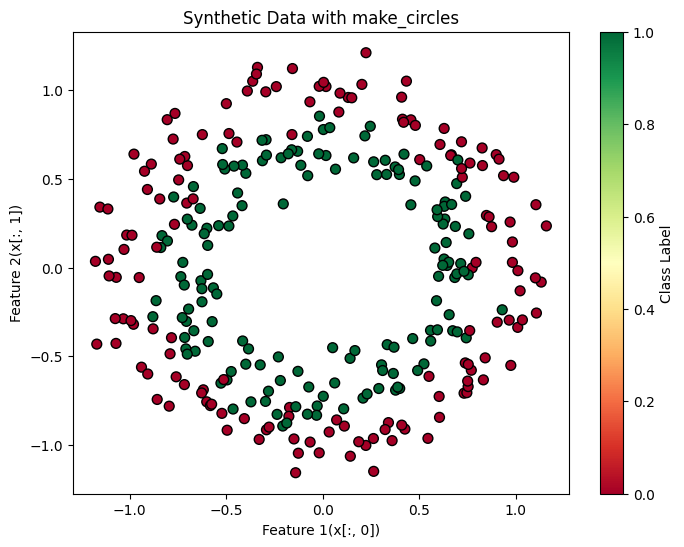

In [5]:
#Import necessary ML modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Create synthetic data
x, y = make_circles(n_samples=300, noise=0.1, factor=0.7, random_state=0)

#plot the points with their labels
plt.figure(figsize=(8,6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k', marker='o', s=50)
plt.xlabel("Feature 1(x[:, 0])")
plt.ylabel("Feature 2(x[:, 1])")
plt.title("Synthetic Data with make_circles")
plt.colorbar(label='Class Label')
plt.show()


In [ ]:
#Import necessary ML modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive 

#Function to update and display the plot
def update_plot(hidden_layer_size):
    #Generate synthetic data
    x, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)
    
    # Initialize and train the MLPClassifier
    model = MLPClassifier(hidden_layer_sizes=(hidden_layer_size), activation='relu', 
                          max_iter=3000, random_state=1)
    
    #fit the classifier to the data
    model.fit(x, y)
    
    # Create a grid of points for visualization
    # 1D arrays of 100 values each, representing the x and y coordinates of the grid
    x_vals = np.linspace(x[:, 0].min() - 0.1, x[:, 0].max() + 0.1, 100)
    y_vals = np.linspace(x[:, 1].min() - 0.1, x[:, 1].max() + 0.1, 100)
    
    #The resulting x and y plane are both 100x100 arrays representing the grid of 10,000 points
    x_plane, y_plane = np.meshgrid(x_vals, y_vals)
    
    #Grid points is a single 2D array with shape (10000, 2), where each row is a point in the grid
    grid_points = np.column_stack((x_plane.ravel(), y_plane.ravel()))
    
    #Predict the class for each point in the grid
    Z = model.predict(grid_points)
    
    #Reshape the predictions back to the grid shape (100, 100)
    Z = Z.reshape(x_plane.shape)
    
    #predict class labels for the original data points
    y_pred = model.predict(x)
    
    #clear previous plot
    plt.model()
    
    #Plot the decision boundary and data points
    plt.contour(x_plane, y_plane, Z, levels=[-.5, .5, 1.5], cmp=plt.cm.RdYlGn, alpha=0.6)
    
    #plot original data points with predicted labels
    class_0 = (y_pred == 0)     #Indices of points predicted as class 0
    class_1 = (y_pred == 1)     #Indices of points predicted as class 1
    
    plt.scatter(x[class_0, 0], x[class_0, 1], c='red', edgecolors='k', marker='o', s=50, label='Class 0')
    plt.scatter(x[class_1, 0], x[class_1, 1], c='green', edgecolors='k', marker='o', s=50, label='Class 1')
    
    #Add labels and title
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary with Hidden Layer Size: {}".format(hidden_layer_size))
    plt.legend()
    plt.show()

#Create an interactive widget to adjust hidden layer size
hidden_layer_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Hidden Layer Size:')

#Create the interactive widget
interactive_plot = interactive(update_plot, hidden_layer_size=hidden_layer_slider)

#display the widget
display(interactive_plot)